# Logistic Regression & Model Evaluation Techniques

<b> Goals </b>

- Learn the ins and outs of the Logisitic Regression model
- The pros and cons of LR and how it compares to the two other models we've learned so far
- Model evaluation beyond accuracy score: sensitivity, recall, precision, roc_auc,and more
- Cross validating and plotting with new model evaluation techniques

## Logistic Regression

- Logistic regression is a generalization of the linear regression model adapted to
 to classification problems.
 
- Very popular because it's very fast and interpretable. Doesn't need scaling or much tuning.

- Not vulnerable to overfitting when you don't have many features.
 
- In linear regression, we use a set of quantitative feature variables to predict a continuous response variable. In logistic regression, we use a set of quantitative feature variables to predict probabilities of class membership.

- Named for the function used at the core of the method, the logistic function aka the sigmoid function. 

- Logistic regression is a linear regression between our feature, X, and the log-odds of our data belonging to a certain class that we will call true for the sake of generalization.

Pros:

- Highly interpretable
- Model training and prediction are fast
- No tuning is required (most of the time)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Cons:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Sensitive to irrelevant features

Logit formula:
![w](http://faculty.cas.usf.edu/mbrannick/regression/gifs/lo8.gif)

a = intercept

b = coefficient value

Logit model:
![logit](https://camo.githubusercontent.com/0b115390d4832bfca4c423d6b9c3acdaa1ff01b3/68747470733a2f2f7170682e65632e71756f726163646e2e6e65742f6d61696e2d71696d672d3035656463313837336430313033653336303634383632613435353636646261)

The preceding graph represents the logistic function's ability to map our continuous input, x, to a smooth probability curve that begins at the left, near probability 0, and as we increase x, our probability of belonging to a certain class rises naturally and smoothly up to probability 1. 


In other words:

    • Logistic regression gives an output of the probabilities of a specific class being true
    
    • Those probabilities can be converted into class predictions: if p>= 0.5 the models returns 1 and if p<.0.5 it returns 0
    
    • Logistic function is S-shaped and will always produced values > 0 and < 1.
    
    • Not all relationships as you know are linear, so LR is not always the right model.
    



### Key difference in use of coefficients in linear vs logistic
<br>
Linear Regression: Betas/coefficients represents the change in the response variable for a unit change in x. 

Logistic Regression: They represents the change in the log-odds. For a unit change in x. This means that e^β gives us the change in the odds for a unit change in x.

Coding time

In [124]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification;

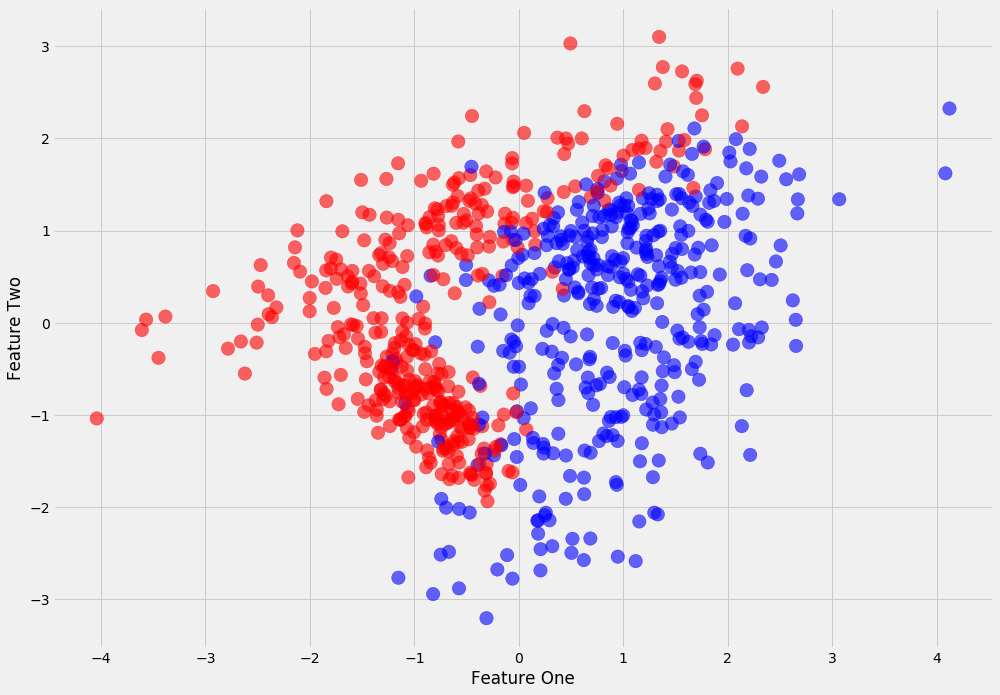

In [38]:
#Use Sklearn to create fake data
data = make_classification(n_samples=800,n_features=2,class_sep=.89,n_informative=2,
                         n_redundant=0, n_repeated=0,n_classes=2, random_state=3)
df = pd.DataFrame(data[0], columns=["feature_one", "feature_two"])
df["target"] = data[1]
#assign red to class 0 and blue to class 1. For plotting purposes.
colors = pd.Series(df["target"]).map({0:"red", 1:"blue"})
plt.figure(figsize=(15,11))
plt.scatter(df.feature_one, df.feature_two, c=colors, s=180, alpha = .6)
plt.xlabel("Feature One",)
plt.ylabel("Feature Two");

If you had to draw a straight line that best separates the two classes, where would you put the line?
<br><br>
Let's focus on Feature Two and plot it against the target variable

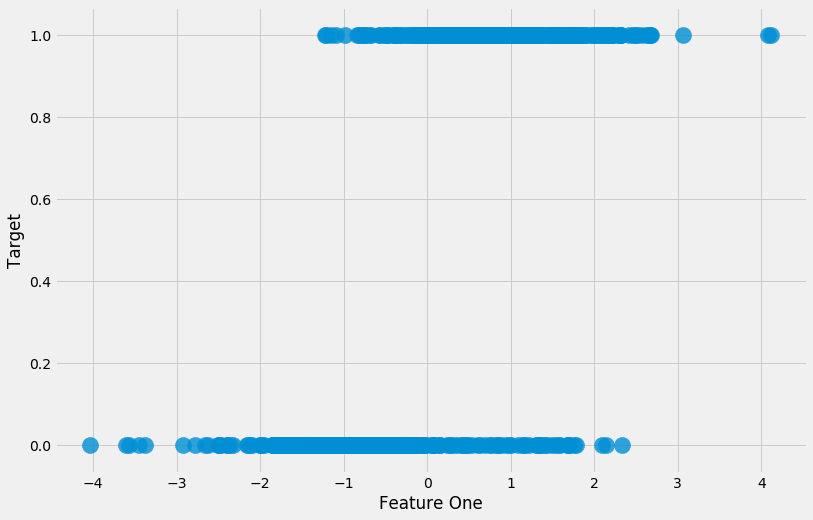

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(df.feature_one, df.target, s=260, alpha=.8)
plt.xlabel("Feature One")
plt.ylabel("Target");

Imagine a logit or S-curve modeling the relationship between the x and y axes.

Let's fit a logistic regression model on the data above and plot the predicted labels and the probabilities

In [40]:
#Sort the dataframe by the feature one and create a new data frame from that.
df2 = df.sort_values("feature_one").copy();

In [41]:
#Assign X and y
X = df2[["feature_one"]]
y = df2.target

In [42]:
#Intialize the logistic regression model
lr = LogisticRegression()
lr.fit(X,y);

In [43]:
#Score the model 
score = lr.score(X,y)
print ("The accuracy score is {:.2f} percent".format(score*100))

The accuracy score is 85.88 percent


In [44]:
#Generate label predictions
lr.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Plot the probabilities and the predictions

In [45]:
#Assign label predictions to pred_labels
pred_labels = lr.predict(X)

In [46]:
#Assign probability of class 1 to pred_probs
pred_probs = lr.predict_proba(X)[:,1]

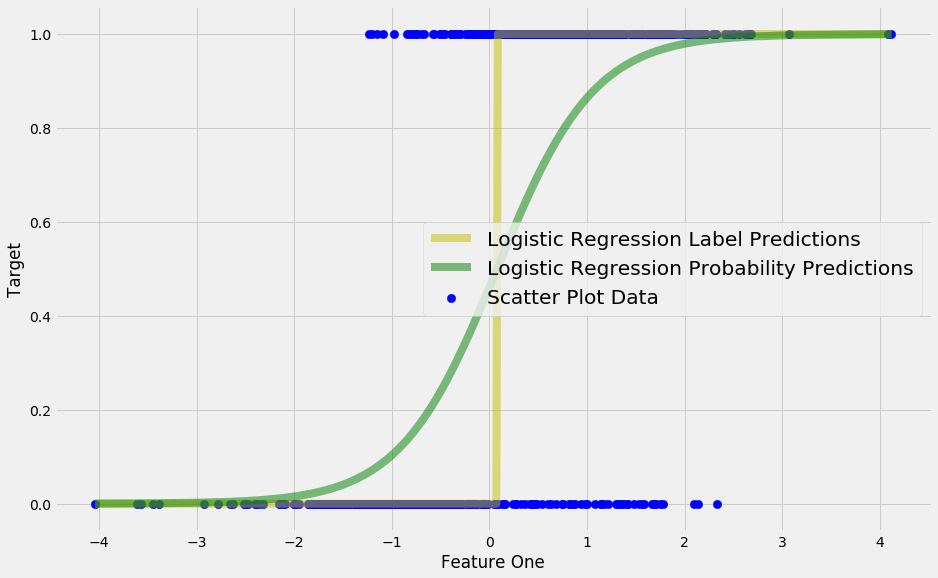

In [47]:
plt.figure(figsize=(14,9))
plt.xlabel("Feature One")
plt.ylabel("Target")
plt.scatter(X.values,y, s=70, c= "blue", alpha=1, label="Scatter Plot Data")
plt.plot(X, pred_labels, c="y", linewidth=8, alpha=.5, label = "Logistic Regression Label Predictions")
plt.plot(X, pred_probs, c="g", linewidth=8, alpha=.5, label = "Logistic Regression Probability Predictions")
plt.legend(loc="right", fontsize="x-large");

What do you see? What is the graph showing us?

Go back to the original dataset with two features and visualize the linear boundary

In [78]:
#Plot visualizing function
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(12, 9))
    plt.contourf(xx, yy, Z, cmap="RdBu", alpha=0.2)
    plt.scatter(X[:,0], X[:,1],cmap = "RdBu", c=y,s=60, alpha=0.4)
    plt.xlabel("Feature One")
    plt.ylabel("Feature Two")

In [65]:
#Create X and y variables from data using df
X = df.drop("target", axis=1)
y = df.target

In [66]:
#Intialize model and fit it to X and y
lr = LogisticRegression()
lr.fit(X,y);

Imagine what the boundary would look like in this plot

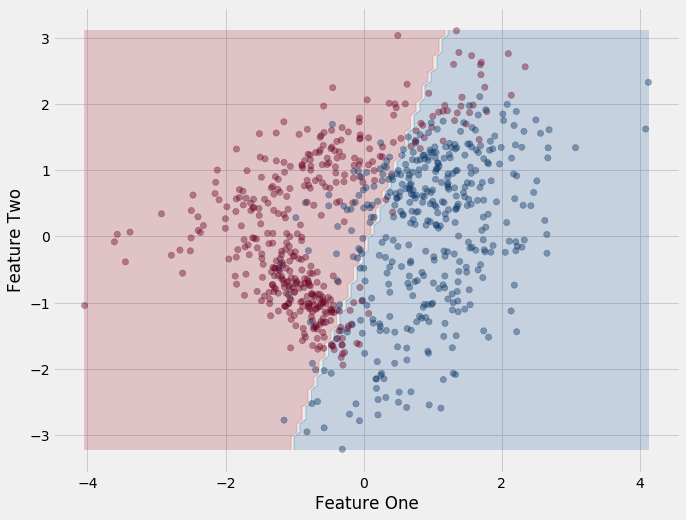

In [80]:
plot_decision_boundary(lr, X.values,y);

This graph demonstrates the linearness of the logistic regression algorithm.

## <b> Can you use Spotify data to predict whether or not I will like a song? </b>

<b> Attributes </b>


    Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
    
    Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

    Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    
    Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
    
    Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

    Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
    Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

    Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    
More information here https://developer.spotify.com/web-api/get-audio-features/

My article detailing my process and findings: https://opendatascience.com/blog/a-machine-learning-deep-dive-into-my-spotify-data/

In [81]:
#Load the datafile "Spotify_Data.pkl" and check it out
df = pd.read_pickle("../../data/Spotify_Data.pkl")
df.head()

,acousticness,mode,tempo,loudness,danceability,instrumentalness,valence,energy,target
Mask_Off***Future,0.0102,1,150.062,-8.795,0.833,0.021900,0.286,0.434,1
Redbone***Childish_Gambino,0.1990,1,160.083,-10.401,0.743,0.006110,0.588,0.359,1
Xanny_Family***Future,0.0344,1,75.044,-7.148,0.838,0.000234,0.173,0.412,1
Master_Of_None***Beach_House,0.6040,1,86.468,-15.236,0.494,0.510000,0.230,0.338,1
Parallel_Lines***Junior_Boys,0.1800,0,174.004,-11.648,0.678,0.512000,0.904,0.561,1


Quick EDA: Summary stats grouped by class and correlations

In [82]:
#Summary stats
df.describe()

,acousticness,mode,tempo,loudness,danceability,instrumentalness,valence,energy,target
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.612295,121.603272,-7.085624,0.618422,0.133286,0.496815,0.681577,0.505702
std,0.259989,0.487347,26.685604,3.761684,0.161029,0.273162,0.247195,0.210273,0.500091
min,0.000003,0.000000,47.859000,-33.097000,0.122000,0.000000,0.034800,0.014800,0.000000
25%,0.009630,0.000000,100.189000,-8.394000,0.514000,0.000000,0.295000,0.563000,0.000000
50%,0.063300,1.000000,121.427000,-6.248000,0.631000,0.000076,0.492000,0.715000,1.000000
75%,0.265000,1.000000,137.849000,-4.746000,0.738000,0.054000,0.691000,0.846000,1.000000
max,0.995000,1.000000,219.331000,-0.307000,0.984000,0.976000,0.992000,0.998000,1.000000


In [83]:
#Difference between class 0 and class 1
df.groupby("target").mean()

,acousticness,mode,tempo,loudness,danceability,instrumentalness,valence,energy
target,,,,,,,,
0,0.221670,0.647944,120.666027,-6.811743,0.589648,0.091135,0.469836,0.673138
1,0.154279,0.577451,122.519382,-7.353329,0.646547,0.174486,0.523186,0.689826


Thoughts? Things of interest? Which variables stick out to you?

Train a logistic regression model on the data to predict whether or not I will like a certain song

In [84]:
#Create X and y variables
X = df.drop("target", axis=1)
y = df.target

#Intialize, fit, and score the model
lr = LogisticRegression()

lr.fit(X,y)

score = lr.score(X,y)

print ("The model produces an accuracy score of {:.2f} percent".format(score*100))

The model produces an accuracy score of 63.96 percent


Is that a good or bad score? To find out let's compare it to the null accuracy.

In [85]:
#Find the null accuracy aka the benchmark score
y.value_counts(normalize=True)

1    0.505702
0    0.494298
Name: target, dtype: float64

### Class Exercise

#### <b> Training/testing  </b>
1. Split the data into train/test splits
2. Fit data onto training set
3. Make predictions on test set with the training model
4. Calculate accuracy score by comparing predicted labels of the test set to its actual labels

In [63]:
#Step 1
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4,
                                                    random_state=42)
#Step 2
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Step 3
preds = lr.predict(X_test)

#Step 4
testing_score = accuracy_score(y_test, preds)

print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

The model accurately classified 63.57 percent of the testing data


How does the testing accuracy compare to the first one?
<br><br><br><br>
Use cross validation to derive a truer testing accuracy score

In [64]:
#Use cross_val_score method to generate the average accuracy score for 5 CVs
mean_cv_score = cross_val_score(LogisticRegression(), X,y, cv=5, scoring="accuracy").mean()

print ("The cross validated accuracy score is {:.2f} percent").format(mean_cv_score*100)

The cross validated accuracy score is 58.50 percent


### Probability, odds, e, log, log-odds. How to interpret logisitc regression coefficients
<br>
Quick stats and probability detour

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

In [86]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


What is e? It is the base rate of growth shared by all continually growing processes:

In [87]:
# exponential function: e^1
np.exp(1)

2.718281828459045

In [67]:
# time needed to grow 1 unit to 2.718 units
np.log(2.718)

0.99989631572895199

It is also the inverse of the exponential function:

In [88]:
np.log(np.exp(5))

5.0

In [89]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


The log odds are what is passed throught the logistic function

Train model using one feature: "valence"

In [90]:
V = df[["valence"]]
lr_V = LogisticRegression()
lr_V.fit(V, y);

In [91]:
# compute predicted log-odds for valence_value=0.5...
#by multiplying it by coefficien and then adding the intercept to it

valence_value = 0.5
logodds = lr_V.intercept_ + lr_V.coef_[0]*valence_value
logodds

array([0.02660263])

In [92]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([1.02695964])

In [93]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([0.50665027])

In [94]:
# compute predicted probability for valence_value using the predict_proba method
lr_V.predict_proba(valence_value)[:, 1]

array([0.50665027])

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).
<br><br><br><br><br><br><br><br>
Re-fit model but all the variables and make table of the coefficients and odds

In [127]:
X = df.drop("target", axis=1)
y = df.target
lr = LogisticRegression()
lr.fit(X,y);

In [97]:
#Table of coefficients and their values
coef = pd.DataFrame(list(zip(X.columns, np.transpose(lr.coef_[0]))), columns=["coef", "value"])
coef

,coef,value
0,acousticness,-1.608505
1,mode,-0.240678
2,tempo,0.003301
3,loudness,-0.108442
4,danceability,1.821116
5,instrumentalness,1.202698
6,valence,0.620524
7,energy,0.344893


Odds ratio is the ratio of the odds(after increasing X_i by 1) over (divided) by odds(before increasing X_i by 1).

In [98]:
coef_odds = np.e**(coef["value"])
coef["odds_ratio"] = coef_odds
coef

,coef,value,odds_ratio
0,acousticness,-1.608505,0.200187
1,mode,-0.240678,0.786095
2,tempo,0.003301,1.003306
3,loudness,-0.108442,0.897231
4,danceability,1.821116,6.178751
5,instrumentalness,1.202698,3.329087
6,valence,0.620524,1.859902
7,energy,0.344893,1.411839


The increase in probability is hard to quantify.  The lower p(before) is, the greater increase you'll have vs. a higher p(before).

#Visualize how the Beta and intercept can affect the probabilities

![logit](http://nbviewer.jupyter.org/github/justmarkham/DAT8/blob/master/notebooks/images/logistic_betas.png)

Changing the $\beta_0$ or intercept value shifts the curve horizontally, whereas changing the $\beta_1$ or coefficient value changes the slope of the curve.

## <b> Model Evaluation techniques </b>

![s](http://www.dataschool.io/content/images/2015/01/confusion_matrix2.png)

True Positives (TP): Number of correct positive predictions

True Negatives (TN): Number of correct negative predictions

False Positives (FP): Number incorrect positive predictions

False Negatives (FN): Number of incorrect negative predictions

Recall aka sensitivity aka the True Positive Rate: The number of correct positive predictions divided by number of positive instances

Precision: The number of correct positive predictions divided by number of positive predictions

False Positive Rate aka Fall Out: The number of incorrect positive predictions divided by number of negative instances

True Negative Rate aka Specificity: The number of correct negative predictions divided by number of negative instances 

Formula table:
![a](http://www.chioka.in/wp-content/uploads/2013/08/Metrics-Table.png)

Confusion matrix with metrics:

![s](https://eus-www.sway-cdn.com/s/4YEmvTlyess2YF1M/images/VfcIF1yrYJrvLl?quality=1071&allowAnimation=true)

Super confusion matrix:
![q](https://image.ibb.co/bXkGxm/Screen_Shot_2017_11_28_at_12_03_48_PM.png)

Think about how these metrics can tell us more about the efficacy of a model as opposed to accuracy score.

Is one metrics more useful than others? In which context would it make sense to evaluate a model based on FPR vs FNR?

Create confusion matrix for the Spotify data and calculate recall and precision scores

In [128]:
#Make a train test split of the spotify data and train logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=4)
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
probs = lr.predict_proba(X_test)[:, 1]

In [129]:
#Null accuracy of y_test
y_test.value_counts(normalize=True)

1    0.522523
0    0.477477
Name: target, dtype: float64

In [130]:
#Pass the predictions and y_test into a confusion matrix
cm = confusion_matrix(y_test, preds)
cm

array([[204, 114],
       [140, 208]])

Let's try calculating the TPR, TNR, FPR, and FNR rates manually

In [102]:
#TPR
cm[1,1]/float(cm.sum(axis=1)[1])

0.5977011494252874

In [103]:
#TNR
cm[0,0]/float(cm.sum(axis=1)[0])

0.6415094339622641

In [104]:
#FPR
cm[0,1]/float(cm.sum(axis=1)[0])

0.3584905660377358

In [105]:
#FNR
cm[1,0]/float(cm.sum(axis=1)[1])

0.40229885057471265

If you were a spotify data scientist would you want a model that produces more false negatives or false positives?

In [106]:
#Calculate precision and recall scores with sklearn
ps = precision_score(y_test, preds)
rs = recall_score(y_test, preds)

print ("The precision score is {:.2f} and the recall score is {:.2f}".format(ps*100, rs*100))

The precision score is 64.60 and the recall score is 59.77


No function for false positive (fall out) scores

Cross validate with precision and recall

In [107]:
#Precision
cross_val_score(LogisticRegression(), X, y, cv = 5, scoring="precision").mean()

0.5932581001008234

In [108]:
#Recall
cross_val_score(LogisticRegression(), X, y, cv = 5, scoring="recall").mean()

0.6127450980392157

### Log Loss

![s](images/log_loss_2.png)

![w](http://wiki.fast.ai/images/4/43/Log_loss_graph.png)

In [131]:
#evaluate on test set

log_loss(y_test, probs)

0.6500121289377357

In [133]:
#cross validate 

cross_val_score(LogisticRegression(), X, y, cv =5, scoring = "neg_log_loss").mean()

-0.739961325218402

Now let's add some context to the log loss value by using the null accuracy

In [138]:
#Repeat null_accuracy for each row in y_test
null_acc = np.repeat(0.522, repeats=(y_test.shape[0]))

#Pass into log_loss function

log_loss(y_test, null_acc)

0.6921328562862793

### ROC_AUC curve

![w](https://chrisalbon.com/images/machine_learning_flashcards/Receiver_Operating_Characteristic_print.png)

ROC (receiver operating characteristic) curve is a commonly used way to visualize the performance of a binary classifier.

AUC (area under curve) is arguably the best way to summarize a model performance's in a single number.

In [109]:
#Derive probabilities of class 1 from the test set
test_probs = lr.predict_proba(X_test)[:,1]
#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Outputs the fpr, tpr, for varying thresholds

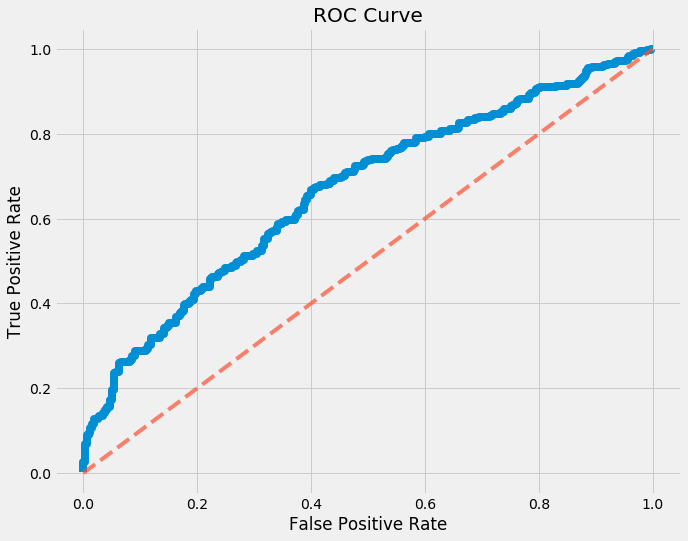

In [111]:
#Plotting False Positive Rates vs the True Positive Rates
#Dotted line represents a useless model
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, linewidth=8)
#Line of randomness
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

How do you rate this model?

In [112]:
#Caculate the area under the curve score using roc_auc_score
roc_auc_score(y_test, test_probs)

0.6639467216077496

In [113]:
#Cross validated roc_auc score
cross_val_score(LogisticRegression(), X, y, cv = 5, scoring="roc_auc").mean()

0.6116370455217263

What is the relationship between the thresholds and FPR and TPR?

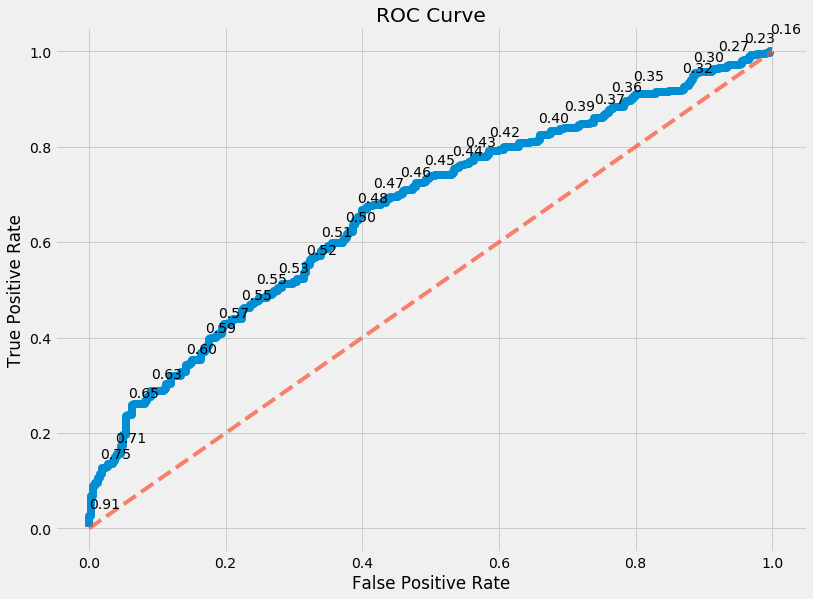

In [114]:
#Plot ROC_curve again but this time annotate the curve with the threshold value
plt.figure(figsize=(12,9))
plt.plot(fpr, tpr, linewidth=8)
plt.plot([0,1], [0,1], "--", alpha=.7)
for label, x, y in zip(thres[::10], fpr[::10], tpr[::10]):
    plt.annotate("{0:.2f}".format(label), xy=(x, y + .04))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Plotting threshold vs FPR/TPR on the same plot

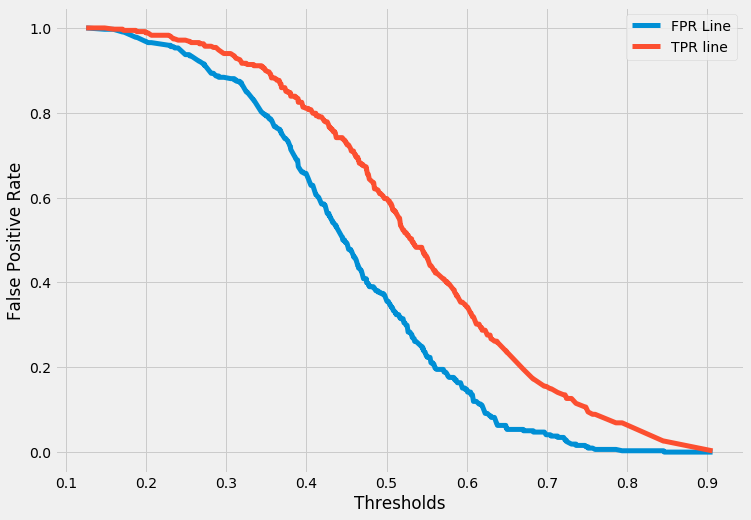

In [115]:
plt.figure(figsize=(11,8))
plt.plot(thres, fpr, linewidth=5, label = "FPR Line")
plt.plot(thres, tpr, linewidth=5, label = "TPR line")
plt.xlabel("Thresholds")
plt.ylabel("False Positive Rate")
plt.legend()
plt.show();

What do you see here? Why are is there a negative correlation in both lines?


Thresholds and model performance: Does tweaking the threshold give us a better model?</b>
<br><br>
Unfortunately there's no threshold to configure in a logistic regression model. 
<br>For example: lr = logisticregression(threshold=n) 
<br>
<br>So we need to create our own threshold function using the np.where function

In [118]:
#Assign all the values in test_probs >=0.6 == 1 and the rest equal to 0
#First argument is condition
#Second argument is the value you use to replace all the values that satisfy the condition
#Third argument is the value you use to replace all the values that don't satisfy the condition
labels_60 = np.where(test_probs>=0.6, 1, 0)
labels_60[:20]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

Does this give a better accuracy score?

In [119]:
accuracy_score(y_test, labels_60)

0.5855855855855856

In [120]:
#Put this in function form

def thres_acc(t, yt, tp):
    labels = np.where(tp>=t, 1, 0)
    return accuracy_score(yt, labels)

Plot various thresholds vs their accuracy scores

In [121]:

thresholds = np.linspace(0,1, 30)
acc_scores = [thres_acc(i, y_test, test_probs) for i in thresholds]

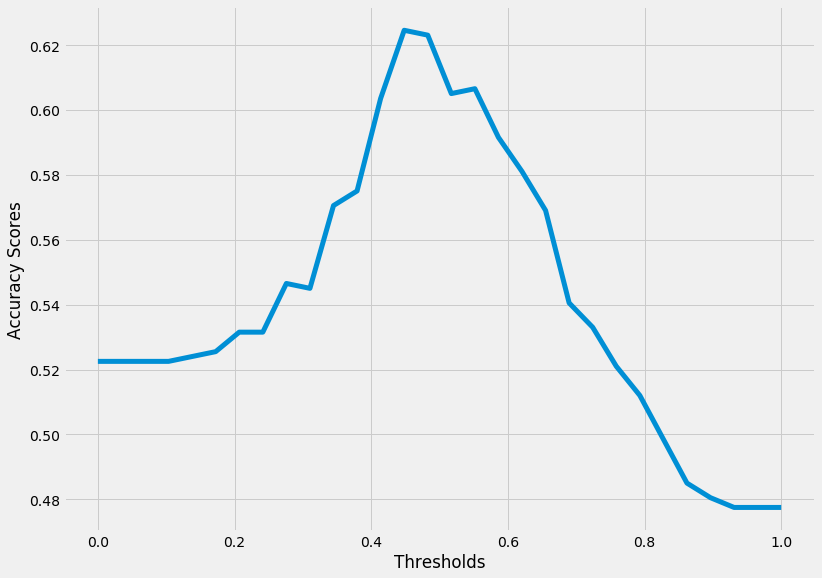

In [122]:
#Plot thresholds vs accuracy scores
plt.figure(figsize=(12,9))
plt.plot(thresholds, acc_scores, linewidth=5)
plt.xlabel("Thresholds")
plt.ylabel("Accuracy Scores")
plt.show()

In [123]:
#Which threshold produces the best accuracy score?
thres_score_dict = dict(zip(thresholds,acc_scores))
sorted(thres_score_dict.items(), key = lambda x:x[1], reverse=True)[0][0]

0.4482758620689655

## Bonus Section: KNN vs DT vs LR

In this section, let's compare and contrast the three algorithms we've learned so far by visualizing them on varying fake data from sklearn.

In [139]:
#Imports
from itertools import product
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Dataset 1: circles

In [140]:
X, y = make_circles(n_samples=500,noise=.05, random_state=30,factor=.6)

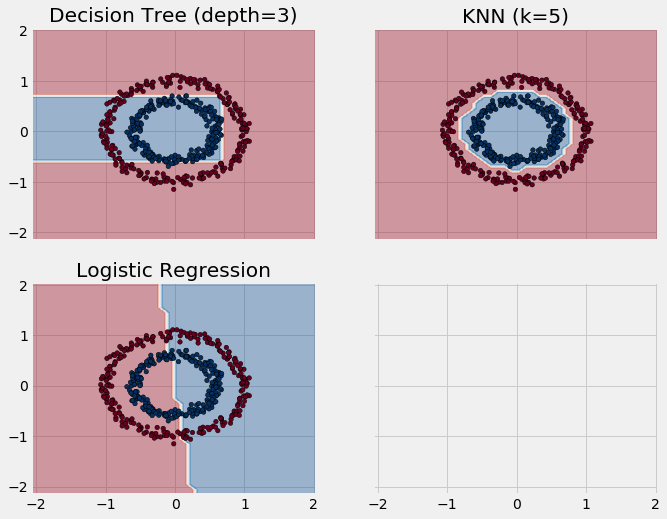

In [143]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = LogisticRegression()

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)


# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3],
                        ['Decision Tree (depth=3)', 'KNN (k=5)',
                         'Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z,cmap = "RdBu", alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, cmap = "RdBu",
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

Dataset 2: Moons

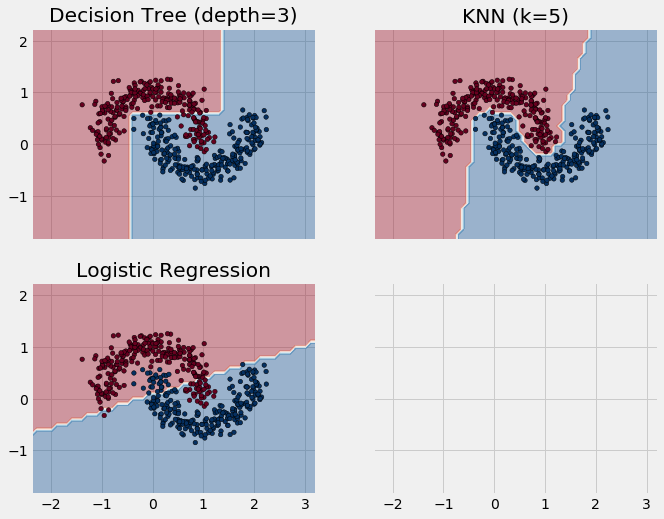

In [145]:
X, y = make_moons(n_samples=500,noise=.15, random_state=30)
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = LogisticRegression()

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)


# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3],
                        ['Decision Tree (depth=3)', 'KNN (k=5)',
                         'Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, cmap = "RdBu", alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, cmap = "RdBu",
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

Dataset 3: Blobs

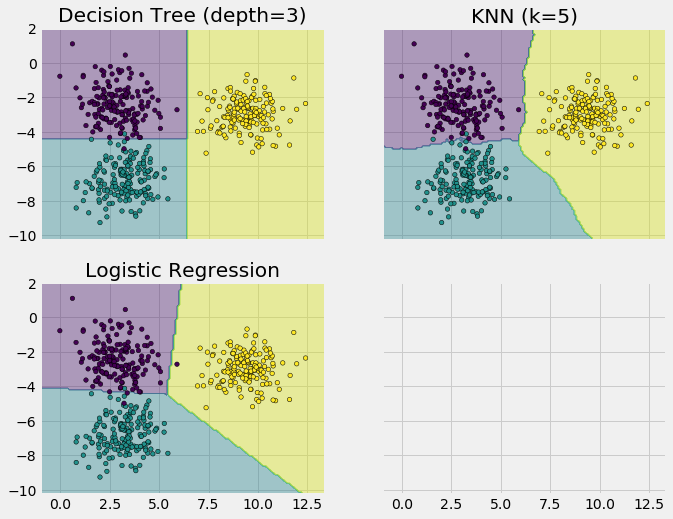

In [146]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=30)
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = LogisticRegression()

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)


# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3],
                        ['Decision Tree (depth=3)', 'KNN (k=5)',
                         'Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## Resources

Logistic regression:
- http://www.dataschool.io/guide-to-logistic-regression/
- https://onlinecourses.science.psu.edu/stat504/node/149
- https://www.youtube.com/watch?v=_Po-xZJflPM
- https://www.youtube.com/watch?v=gNhogKJ_q7U
- https://www.youtube.com/watch?v=fJ53tIDbvTM

Evalution:
- http://www.dataschool.io/roc-curves-and-auc-explained/
- http://people.inf.elte.hu/kiss/13dwhdm/roc.pdf


## In class work
<br><br>
For the rest of class work on modeling one of the following datasets: primary, spotify, employee churn (HR_comma_sep.csv), iris, titanic, pokemon, or use fake data from sklearn. Create roc_curves for your models.
<br><br>
Compare and contrast logistic regression, decision trees, and k-nearest neighbors using the new metrics we learned in this class. Which algorithm is better for FPR or FNR? 
<br><br>